In [1]:
import cv2
import pytesseract
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('recibo1.jpeg')

In [3]:
custom_config = r'--oem 3 --psm 6 -l por'
pytesseract.image_to_string(img, config=custom_config)

'Cie (o\ne Da ro Re\nEnio E tipo\nSep ei, pato\nEd E e a a\na ss ”\n-. CACIA\nBI 21\nirro: JD ESTELA\nSTAURANTI\nE Infornad aTiio CAURANTE EIREL A CALUBI, 21 - Nao\nSTR A = SANTO ANDRE - 0918:91402824000\n179 TE:121029205 il\n- 01693 UP e\nTA do CUPOM FISCAL ELETR\no04 E SL UN R$ICULTR R$)=]\no 180 ENTREGA 40,00 10 UN K\n, pe 203 ISCA DE FRANGO P\n6,00 24 UN X 19,50 005 3\n04 ISCA DE FRANGO 32,00 2 UN K 16,00\nDO? 407 SALADA MIX 27,80 2 UM\nk 13,90\nTOTAL R$ 429,80\nOutros 429,80\nICNS a ser recolhido confornf4.05,05.04-Comete c\nrime que\nOBSERVAÇÕES DO CONTRIBUINTEOp tante pelo simples\nnaciona\n2400 0179 5900 0475 9680 0\nConsumidor\nCONSUMIDOR NÃO\nIDENTIFICADO\ne SAT 000,47\n04/10/2021 - 10:55\nCode pelo a “De olho na nota\nConsulte o OR\no iispo” Appstore (foplaldo!BlasSo\n\x0c'

### Retorna imagem em tons de cinza

In [4]:
def get_grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

### Remoção de ruído

In [5]:
def remove_noise(img):
    return cv2.medianBlur(img, 5)

### Thresholding

In [6]:
def thresholding(img):
    return cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)[1]

### Dilation

In [7]:
def dilate(img):
    kernel = np.ones((5,5), np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

### Erosion

In [8]:
def erode(img):
    kernel = np.ones((5,5), np.uint8)
    return cv2.erode(img, kernel, iterations = 1)

### opening -> erosion + dilation

In [9]:
def opening(img):
    kernel = np.ones((5,5), np.uint8)
    return cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

### Canny edge detection

In [10]:
def canny(img):
    return cv2.Canny(img, 100, 200)

### Skew correction

In [11]:
def deskew(img):
    coords = np.column_stack(np.where(img > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.wapAffine(img, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

### Match template

In [12]:
def match_template(img, template):
    return cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)

## Workspace:

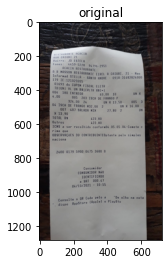

In [19]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('original')
plt.show()

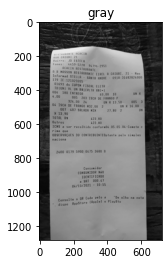

In [20]:
gray = get_grayscale(img)
gray_rgb = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
plt.imshow(gray_rgb)
plt.title('gray')
plt.show()

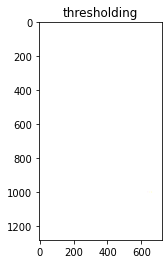

In [23]:
thresh = thresholding(img)
thresh_rgb = cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB)
plt.imshow(thresh_rgb)
plt.title('thresholding')
plt.show()

In [22]:
opening = opening(img)
opening_rgb = cv2.cvtColor(opening, cv2.COLOR_BGR2RGB)
plt.imshow(opening_rgb)
plt.title('opening')
plt.show()

TypeError: 'numpy.ndarray' object is not callable

In [18]:
canny = canny(img)
canny_rgb = cv2.cvtColor(canny, cv2.COLOR_BGR2RGB)
plt.imshow(canny_rgb)
plt.title('canny')
plt.plot(4,4)
plt.show()

TypeError: 'numpy.ndarray' object is not callable